<a href="https://colab.research.google.com/github/Anuj-Main/DataScienceProgramming/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualization

**Importing Libraries**

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Making some DataSet**

Source = Internet

In [73]:
Year=[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
Population=[107, 109, 111, 113, 114, 116, 118, 120, 121, 123]

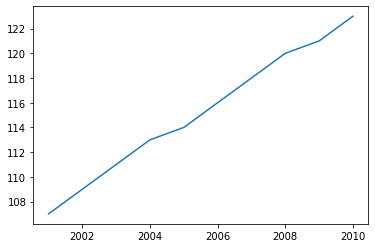

In [74]:
Simple_plot=plt.plot(Year,Population,)

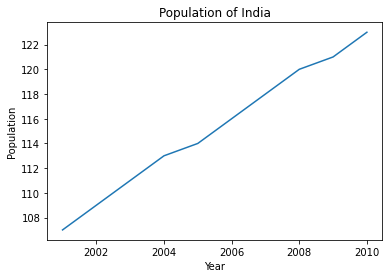

In [75]:
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of India')
Simple_plot=plt.plot(Year,Population,)

**Adding Another Data**

In [76]:
Month=['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Society1=[14,15,16,15,11,10,9,3,6,4,5,14]
Society2=[10,9,22,12,15,9,18,7,13,15,14,8]

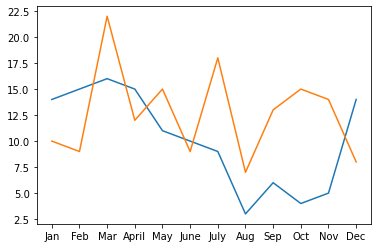

In [77]:
plt.plot(Month,Society1)
plt.plot(Month,Society2)

**Change Colour and marker to define different Society or to know which Client have which colour and marker**
You can see colour and Maker which are used in matplotlib.

Matplotlib.org

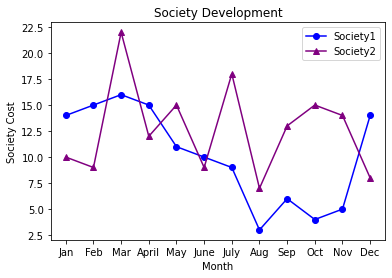

In [78]:
plt.plot(Month,Society1,color='Blue', label='Society1', marker='o')
plt.plot(Month,Society2,color='Purple', label='Society2', marker='^')
plt.xlabel('Month')
plt.ylabel('Society Cost')
plt.title('Society Development')
plt.legend()


Now we can easily see that which society have more development cost to entire year.

**Now we seperating the graph of Society1 and Scoiety2.**

Text(0.5, 1.0, 'Society Development of Society1')

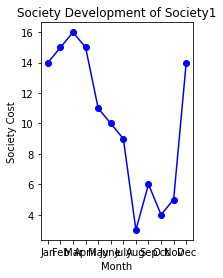

In [79]:
plt.subplot(1,2,1)
plt.plot(Month,Society1,color='Blue', label='Society1', marker='o')
plt.xlabel('Month')
plt.ylabel('Society Cost')
plt.title('Society Development of Society1')

Text(0.5, 1.0, 'Society Development of Society2')

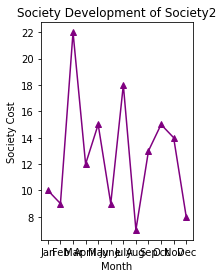

In [80]:
plt.subplot(1,2,1)
plt.plot(Month,Society2,color='Purple', label='Society2', marker='^')
plt.xlabel('Month')
plt.ylabel('Society Cost')
plt.title('Society Development of Society2')

**Try Different Graphs**

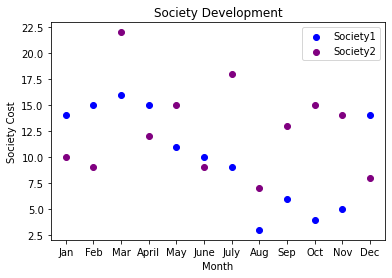

In [81]:
plt.scatter(Month,Society1,color='Blue', label='Society1')
plt.scatter(Month,Society2,color='Purple', label='Society2')
plt.xlabel('Month')
plt.ylabel('Society Cost')
plt.title('Society Development')
plt.legend()

If you are using Scatter plot use plt.grid() for better view like this below.


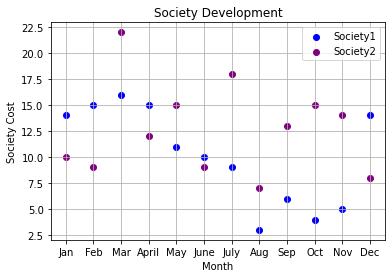

In [82]:
plt.scatter(Month,Society1,color='Blue', label='Society1')
plt.scatter(Month,Society2,color='Purple', label='Society2')
plt.xlabel('Month')
plt.ylabel('Society Cost')
plt.title('Society Development')
plt.grid()
plt.legend()

**Histogram**

Text(0.5, 1.0, 'Society Development')

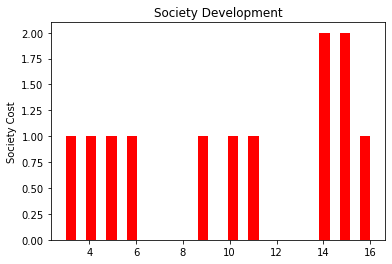

In [83]:
plt.hist(Society1,bins=30,color='Red')
plt.ylabel('Society Cost')
plt.title('Society Development')

<BarContainer object of 12 artists>

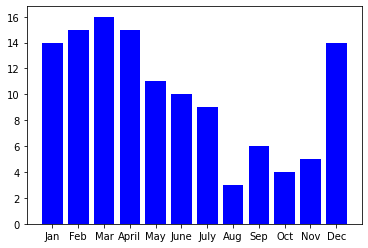

In [84]:
plt.bar(Month,Society1,color='blue')

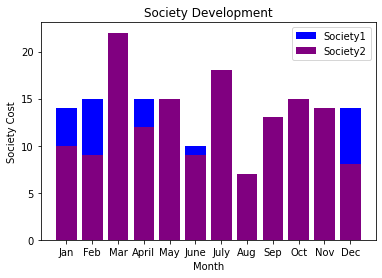

In [85]:
plt.bar(Month,Society1,color='Blue', label='Society1')
plt.bar(Month,Society2,color='Purple', label='Society2')
plt.xlabel('Month')
plt.ylabel('Society Cost')
plt.title('Society Development')
plt.legend()

Now as we can se society2 is cover the society1.

Seperate the society1 and society2 bars.

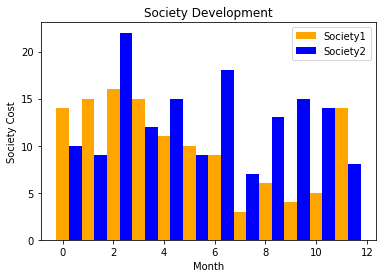

In [91]:
Width_bar=0.5
Month_bar=np.arange(12)
plt.bar(Month_bar,Society1,Width_bar,color='Orange',label='Society1')
plt.bar(Month_bar+Width_bar,Society2,Width_bar,color='Blue',label='Society2')
plt.xlabel('Month')
plt.ylabel('Society Cost')
plt.title('Society Development')
plt.legend()

As we can see the month is in number so there is another way to show the month.

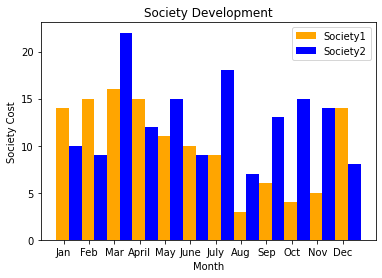

In [94]:
Width_bar=0.5
Month_bar=np.arange(12)
plt.bar(Month_bar,Society1,Width_bar,color='Orange',label='Society1')
plt.bar(Month_bar+Width_bar,Society2,Width_bar,color='Blue',label='Society2')
plt.xlabel('Month')
plt.ylabel('Society Cost')
plt.title('Society Development')
plt.xticks(Month_bar+(Width_bar/12),('Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.legend()

**BoxPlot**

{'boxes': [<matplotlib.lines.Line2D at 0x7f0313ab2850>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0313abf510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0313aabf90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0313aab250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0313ab2b90>,
  <matplotlib.lines.Line2D at 0x7f0313abf850>]}

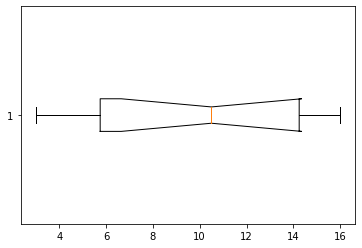

In [95]:
plt.boxplot(Society1,notch=True,vert=False)

Default ploting is Horizontal

{'boxes': [<matplotlib.lines.Line2D at 0x7f0313a376d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0313a3f690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0313a466d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0313a46190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0313a37bd0>,
  <matplotlib.lines.Line2D at 0x7f0313a3f150>]}

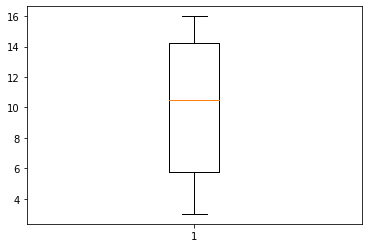

In [96]:
plt.boxplot(Society1,notch=False,vert=True)

#End